In [2]:
import sys
import stmpy
import numpy as np
import cancelv3 as cancel
from decimal import *
import matplotlib.pyplot as plt
from sklearn.externals import joblib

import scipy.fftpack as fftp
import os

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
folder_loc = 'Albert_Data/2019-01-28/'
file_loc = '2019-01-28-geophone-scan'

dat = np.loadtxt(folder_loc+file_loc+'001'+'.dat',skiprows=137)
dat_stmpy = stmpy.load(folder_loc+file_loc+'001'+'.dat')

for j in arange(2,365):
    file = folder_loc+file_loc+str(j).zfill(3)+'.dat'
    try:
#         temp_dat = stmpy.load(folder_loc+file)
        temp_dat = np.loadtxt(file, skiprows=137)
        dat = np.concatenate((dat,temp_dat))
        print(j,end='\r')
    except:
        pass
print(len(dat))

File import successful.
ERR: File not in standard format for processing. Could not correct for Bias offset
9069600


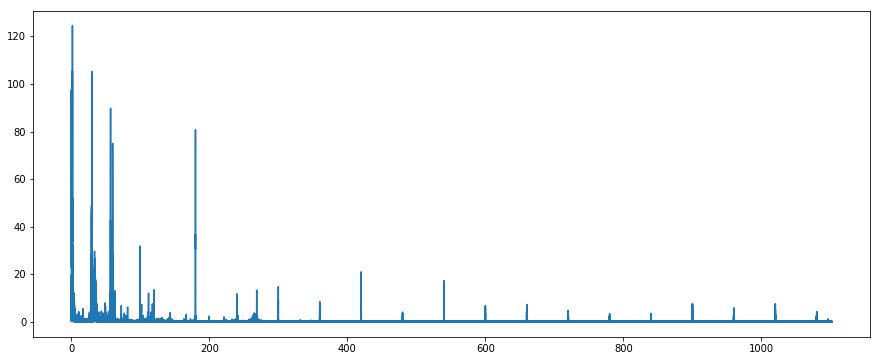

In [16]:
freq = fft.fftfreq(len(dat[:,1]),1/10000)
plot(freq[20:1000000],abs(fft.fft(dat[:,1])[20:1000000]))

#write function to find number of cuts based on resolution

9069600 9069000 9069.0


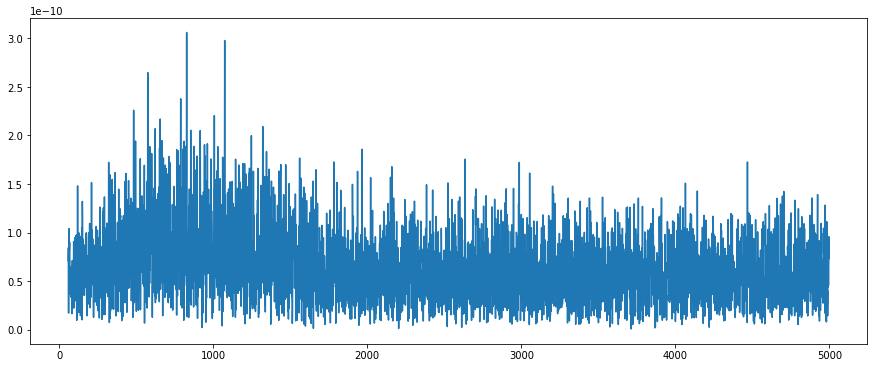

In [144]:
# print(len(dat))
# dat = dat[:]
calibration_length = int(1*len(dat))-600
cut_number = 1000
print(len(dat),calibration_length,calibration_length/cut_number)
cur_cal = dat[:calibration_length,0].reshape(-1,cut_number)
geo_cal = dat[:calibration_length,1].reshape(-1,cut_number)
bias_cal = dat[:calibration_length,2].reshape(-1,cut_number)
mod_cal = dat[:calibration_length,3].reshape(-1,cut_number)
x_cal = dat[:calibration_length,4].reshape(-1,cut_number)
y_cal = dat[:calibration_length,5].reshape(-1,cut_number)
tip_cal = dat[:calibration_length,6].reshape(-1,cut_number)
lix_cal = dat[:calibration_length,7].reshape(-1,cut_number)
liy_cal = dat[:calibration_length,8].reshape(-1,cut_number)

# cur = dat[calibration_length:,0].reshape(-1,cut_number)
# geo = dat[calibration_length:,1].reshape(-1,cut_number)
# bias = dat[calibration_length:,2].reshape(-1,cut_number)
# mod = dat[calibration_length:,3].reshape(-1,cut_number)
# x = dat[calibration_length:,4].reshape(-1,cut_number)
# y = dat[calibration_length:,5].reshape(-1,cut_number)
# tip = dat[calibration_length:,6].reshape(-1,cut_number)
# lix = dat[calibration_length:,7].reshape(-1,cut_number)
# liy = dat[calibration_length:,8].reshape(-1,cut_number)

freq = fft.fftfreq(len(geo_cal[:,0]),1/10000)
plot(freq[int(60/freq[1]):int(5000/freq[1])],abs(fft.fft(liy_cal[:,0])[int(60/freq[1]):int(5000/freq[1])]))

C:\Users\jgoet\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


1.1026574043444701


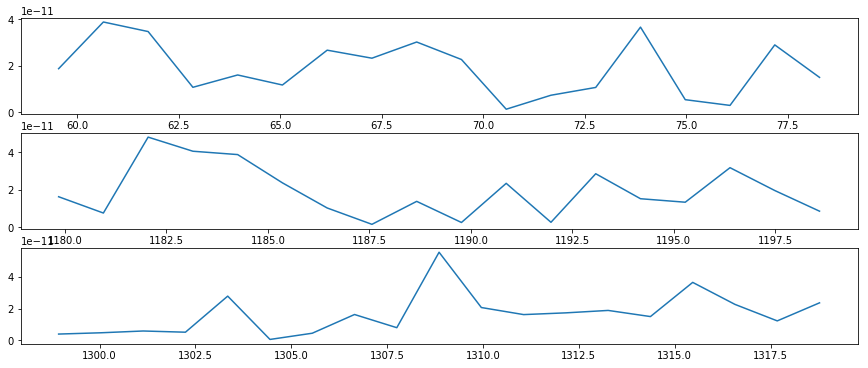

In [148]:
figsize(15,6)
fig,ax = subplots(3,1)
liy_fft = np.zeros((len(liy_cal),cut_number))
# print(len(liy_fft[:,1]),len(liy[1,:]))
# print(liy_fft)
for i in arange(0,cut_number):
    liy_fft[:,i] = fft.fft(liy_cal[:,i]-mean(liy_cal[:,i]))
#     print(liy_fft[:,i])
# print(len(liy_fft[:,1]),len(liy_fft[1,:]))
# print(liy_fft[1,:])
liy_fft = mean(liy_fft,axis=1)

freqs = fft.fftfreq(len(liy_fft),1/10000)
spacing = freqs[1]
print(spacing)
# print(liy_fft[1,:])
line, = ax[0].plot(freqs[int(60/spacing):int(80/spacing)],abs(liy_fft2[int(60/spacing):int(80/spacing)]))
line, = ax[1].plot(freqs[int(1180/spacing):int(1200/spacing)],abs(liy_fft2[int(1180/spacing):int(1200/spacing)]))
line, = ax[2].plot(freqs[int(1300/spacing):int(1320/spacing)],abs(liy_fft2[int(1300/spacing):int(1320/spacing)]))

pylab.show()

In [149]:
print(liy_fft.shape)
print(len(liy_fft)/10000)

(9069,)
0.9069


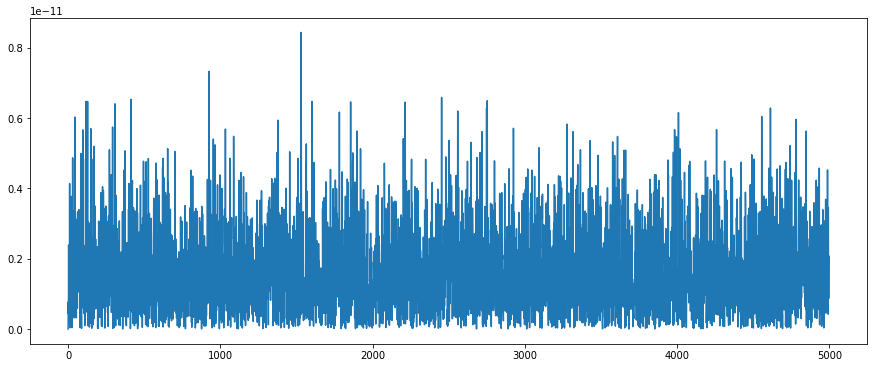

In [151]:
plot(freqs[int(0/spacing):int(5000/spacing)],(abs(liy_fft[int(0/spacing):int(5000/spacing)])))

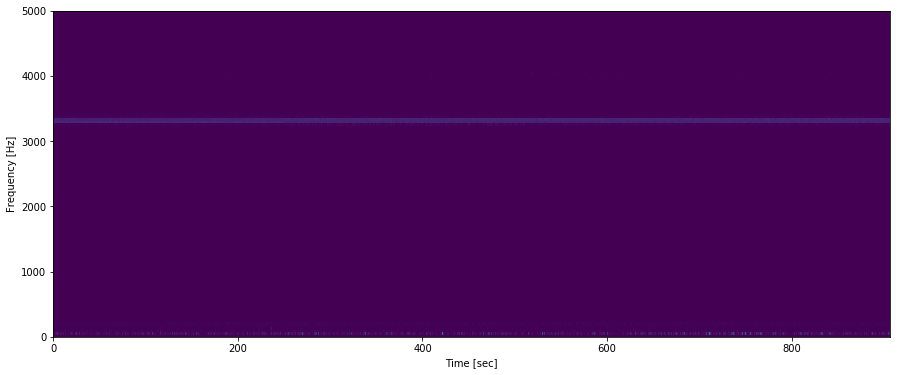

In [115]:
from scipy import signal

f, t, Sxx = signal.spectrogram(dat[:,1], 10000)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
find the lorenzian

create phase wrap, unwrap
create coherent phase data